,Correct Answer,Model Answer,Correct Prediction
0,D,C,False
1,E,E,True
2,B,B,True
3,D,D,True
4,B,B,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Correct Answer      449 non-null    object
 1   Model Answer        449 non-null    object
 2   Correct Prediction  449 non-null    bool  
dtypes: bool(1), object(2)
memory usage: 7.6+ KB
True/False Distribution:
Correct Prediction
True     343
False    106
Name: count, dtype: int64


C:\Users\piper\AppData\Local\Temp\ipykernel_15208\842732510.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=true_false_counts.index, y=true_false_counts.values, palette=["red", "green"])


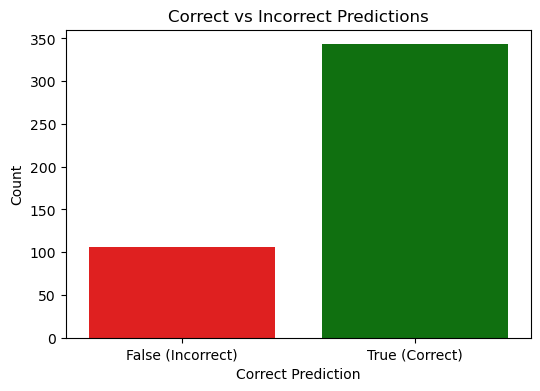

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Φόρτωση αρχείου excel
df = pd.read_excel("RESULTS.xlsx")  

# Εμφάνιση των πρώτων πέντε γραμμών των δεδομένων
display(df.head())

# Πληροφορίες για την δομή του συνόλου δεδομένων
df.info()

# Υπολογισμό κατανομής σωστών και λάθος προβλέψεων
true_false_counts = df["Correct Prediction"].value_counts()

# Display statistics
print("\nTrue/False Distribution:")
print(true_false_counts)

# Δημιουργία Διαγράμματος 
plt.figure(figsize=(6, 4))
sns.barplot(x=true_false_counts.index, y=true_false_counts.values, palette=["red", "green"])
plt.xticks([0, 1], ["False (Incorrect)", "True (Correct)"])
plt.ylabel("Count")
plt.title("Correct vs Incorrect Predictions")
plt.show()

Accuracy: 76.39%
Precision: 76.46%
Recall: 76.23%
F1 Score: 76.33%


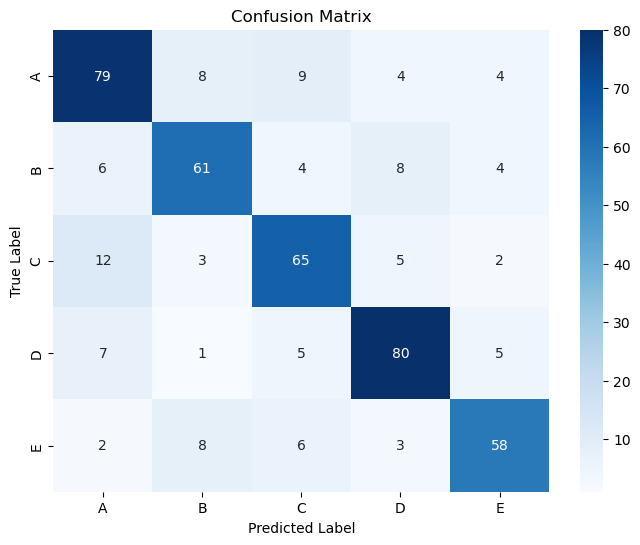

C:\Users\piper\AppData\Local\Temp\ipykernel_15208\393641830.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="tab10")


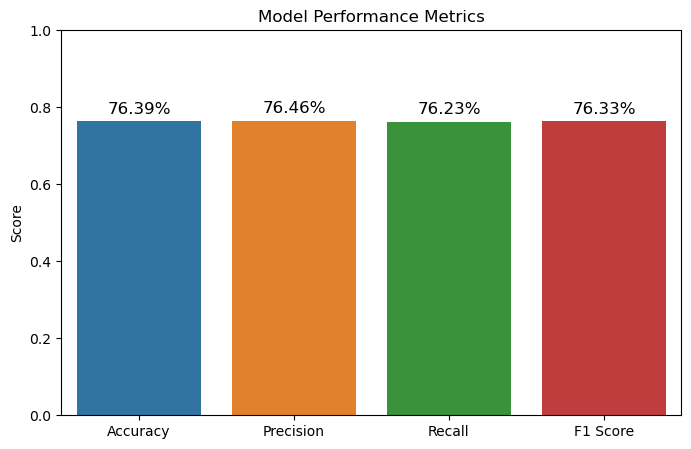

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ορισμός μεταβλητής στόχου (πραγματική τιμή)
y_true = df["Correct Answer"].astype(str).str.strip().str.upper().fillna("N/A")
# Ορισμός μεταβλητής πρόβλεψης (τιμή πρόβλεψης του μοντ΄έλου)
y_pred = df["Model Answer"].astype(str).str.strip().str.upper().fillna("NO_ANSWER")

# Υπολογισμός μετρικών
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")

print(f"Accuracy: {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

# Παραγωγή Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(set(y_true)))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y_true)), yticklabels=sorted(set(y_true)))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Δημιουργία ραβδογράμματος με τις μετρίκες
metrics = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1 Score": f1}
plt.figure(figsize=(8, 5))
ax=sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="tab10")
plt.ylim(0, 1)
plt.ylabel("Score")
plt.title("Model Performance Metrics")

for i, v in enumerate(metrics.values()):
    ax.text(i, v + 0.02, f"{v:.2%}", ha='center', fontsize=12)

plt.show()

In [4]:
# # Υπολογισμός ακρίβειας με άμεση σύγκριση σωστής απάντησης και πρόβλεψης για έλεγχο
match_percentage = (df['Correct Answer'] == df['Model Answer']).mean() * 100
print(match_percentage)